In [3]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import datetime
import statsmodels.api as sm
import pandas as pd
import json
import sys
import string
import codecs
from copy import copy
from hashlib import sha1
import hmac
import matplotlib.dates as mdates
import records
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import datestr2num
import matplotlib.ticker as ticker
import dateutil
from collections import Counter
import seaborn as sb

,created_at,id,game_type_id,game_id,time,game_name,team_id,team_no,team_name,avg_union_score,...,avg_total_score,min_total_score,max_total_score,mid_total_score,avg_ftime,min_ftime,max_ftime,mid_ftime,interval,days
0,2019-04-04 08:05:08,2,7,225,2019/4/20 09:00:00,2019MakeX机器人挑战赛相城积分赛,4283,X012330,完美队,97,...,251,210,305,245,220,200,240,219,229 days 15:54:52,229
1,2019-04-03 12:20:37,3,7,225,2019/4/20 09:00:00,2019MakeX机器人挑战赛相城积分赛,4275,X012326,望晓队,149,...,371,285,510,320,208,157,240,222,230 days 11:39:23,230
2,2019-04-04 10:38:30,4,7,225,2019/4/20 09:00:00,2019MakeX机器人挑战赛相城积分赛,4286,X012332,望星队,146,...,348,200,510,320,202,157,240,215,229 days 13:21:30,229
3,2019-03-07 08:47:04,5,7,225,2019/4/20 09:00:00,2019MakeX机器人挑战赛相城积分赛,4183,X012307,蠡小暗夜公爵战队,151,...,383,275,510,330,178,143,240,174,257 days 15:12:56,257
4,2019-03-07 08:53:37,6,7,225,2019/4/20 09:00:00,2019MakeX机器人挑战赛相城积分赛,4185,X012309,蠡小人类之光战队,130,...,357,220,510,300,203,143,240,240,257 days 15:06:23,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2388,2019-07-11 20:48:04,2399,7,379,2019/8/4 10:30:00,MakeX机器人挑战赛欢乐海岸海洋奇梦馆积分赛,5928,X019380,金雕之翼,74,...,176,120,215,185,206,177,240,203,131 days 03:11:56,131
2389,2019-07-25 19:40:51,2400,7,379,2019/8/4 10:30:00,MakeX机器人挑战赛欢乐海岸海洋奇梦馆积分赛,6340,X019431,Letron2,79,...,169,155,180,170,228,191,240,240,117 days 04:19:09,117
2390,2019-07-25 19:42:16,2401,7,379,2019/8/4 10:30:00,MakeX机器人挑战赛欢乐海岸海洋奇梦馆积分赛,6343,X019434,Letron5,66,...,161,120,210,158,234,217,240,240,117 days 04:17:44,117
2391,2019-07-25 19:41:19,2402,7,379,2019/8/4 10:30:00,MakeX机器人挑战赛欢乐海岸海洋奇梦馆积分赛,6341,X019432,Letron3,66,...,171,140,230,158,224,191,240,232,117 days 04:18:41,117


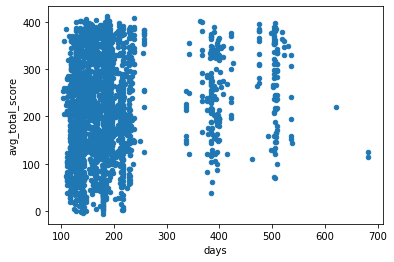

In [4]:
df = pd.read_csv('报名时间_分数.csv')
df.columns = ['created_at','id','game_type_id','game_id','time','game_name',
          'team_id','team_no','team_name','avg_union_score',
          'min_union_score','max_union_score','mid_union_score',
          'avg_total_score','min_total_score','max_total_score',
          'mid_total_score','avg_ftime','min_ftime','max_ftime','mid_ftime']

df['created_at'] = pd.to_datetime(df['created_at'])
date1  = datetime.datetime(2019, 11, 20)
df['interval'] = date1 - df['created_at']
df['days'] = df.interval.dt.days
#绘图
ax1 = df.plot(x='days', y='avg_total_score', kind='scatter')

# #df.sort_values(by = df['interval'], ascending = True )
df

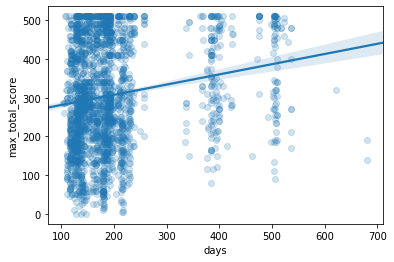

In [5]:
sb.regplot(data = df,x= 'days',y = 'max_total_score',x_jitter = 0.3,scatter_kws = {'alpha':1/5})

In [8]:
df['intercept'] = 1
may = sm.OLS(df['avg_total_score'],df[['intercept','days']])
result = may.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        avg_total_score   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     72.07
Date:                Sun, 22 Dec 2019   Prob (F-statistic):           3.59e-17
Time:                        23:15:26   Log-Likelihood:                -14436.
No. Observations:                2393   AIC:                         2.888e+04
Df Residuals:                    2391   BIC:                         2.889e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    181.7592      4.876     37.277      0.000     172.198     191.321
days           0.1937      0.023      8.489      0.000       0.149       0.238
==============================================================================
Omnibus:                      387.830   Durbin-Watson:                   0.361
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.721
Skew:                          -0.052   Prob(JB):                     5.43e-20
Kurtosis:                       2.063   Cond. No.                         505.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#plot pie
# cr_2017= df[df['days']>688]
# cr_2017.value_counts
# cr_2018 = df[(df['days']>324)&(df['days']<688)]
# cr_2019 = df[df['days']<324]
# pd.value_counts(df['cr_2017'])

#data1 = pd.Series({'2017年选手':pd.value_counts('cr_2017'),'2018年选手':pd.value_counts('cr_2018'),'2019年选手':pd.value_counts('cr_2019')})
#data1
#data1.plot(kind = 'pie', autopct='%.1f%%',title = '2019赛季新老队伍分布')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]), <a list of 52 Text xticklabel objects>)

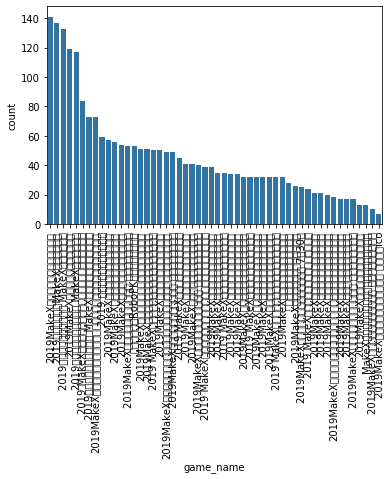

In [60]:
#import counts
base_color = sb.color_palette()[0]
cn_order = df['game_name'].value_counts().index
sb.countplot(data = df,x= 'game_name',color = base_color,order = cn_order)
plt.xticks(rotation = 90)

# cr_2018 = 0
# cr_2019 = 0
# for day in df['days']:
#     if (day<688)&(day>324):
#         cr_2018+=1
#     elif day<324:
#         cr_2019+=1
# print(cr_2018,cr_2019)
# #2018年队伍10。36%， 2019年队伍89.63%
# data2 = pd.unique(df['team_id'])
# data2.shape
    